In [1]:
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms
import matplotlib.gridspec as gridspec

import scipy
import scipy.constants
import scipy.stats as st
from scipy.stats import norm
from scipy.stats import shapiro

import random

import data_util as util


In [20]:
'''Pull in data'''


LIG_NUM = 10

# Pull in coords.dmp
dmp = "../sims_out/lig_num/lig%d/coords.dmp" % LIG_NUM
coords_dat = "out/lig%d/coords.dat" % LIG_NUM
tot_lns = 10011
lns_per_time = 10
bad_lns = 9
tsteps_on = True
first_tstep = 10000
last_tstep = 5010000
tstep_size = 5000
cols = {
    0: "c_coords"
}
coords_data = util.dmp_to_dat(dmp, coords_dat, tot_lns, lns_per_time, bad_lns, cols, tsteps_on=tsteps_on, first_tstep=
                         first_tstep, last_tstep=last_tstep, tstep_size=tstep_size)
# Pull in log.lammps
thermo = "../sims_out/lig_num/lig%d/log.lammps" % LIG_NUM
thermo_dat = "out/lig%d/thermo.dat" % LIG_NUM
header_len = 229
last_ln = 1230
tot_len = 1262
first_tstep = 10000
last_tstep = 5010000
tstep_size = 5000
cols = {  
    1: "Temp",  
    2: "E_pair",  
    3: "E_mol",  
    4: "TotEng",  
    5: "Press"
}
thermo_data = util.thermo_to_dat(thermo, thermo_dat, header_len, last_ln, tot_len, cols, first_tstep, last_tstep, 
                                 tstep_size)
#Hacky -- lazy, so just converting these to dictionaries since everything was written for this
# Convert to dictionary of numpy arrays:
thermo_data = thermo_data.to_dict("series")
for key in thermo_data:
    thermo_data[key] = np.array(thermo_data[key].values)
coords_data = coords_data.to_dict("series")
for key in coords_data:
    coords_data[key] = np.array(coords_data[key].values)
    

In [21]:
'''Pull in data (broken 25 mil)'''


LIG_NUM = 2

# Pull in coords.dmp
dmp = "../sims_out/lig_num/25mil/lig%d/coords.dmp" % LIG_NUM
coords_dat = "out/lig%d/coords.dat" % LIG_NUM
tot_lns = 10001
lns_per_time = 10
bad_lns = 9
tsteps_on = True
first_tstep = 25000
last_tstep = 25000000
tstep_size = 25000
cols = {
    0: "c_coords"
}
coords_data = util.dmp_to_dat(dmp, coords_dat, tot_lns, lns_per_time, bad_lns, cols, tsteps_on=tsteps_on, first_tstep=
                         first_tstep, last_tstep=last_tstep, tstep_size=tstep_size)
# Pull in log.lammps
thermo = "../sims_out/lig_num/25mil/lig%d/log.lammps" % LIG_NUM
thermo_dat = "out/lig%d/thermo.dat" % LIG_NUM
header_len = 229
last_ln = 5230
tot_len = 5262
first_tstep = 10000
last_tstep = 25010000
tstep_size = 5000
cols = {  
    1: "Temp",  
    2: "E_pair",  
    3: "E_mol",  
    4: "TotEng",  
    5: "Press"
}
thermo_data = util.thermo_to_dat(thermo, thermo_dat, header_len, last_ln, tot_len, cols, first_tstep, last_tstep, 
                                 tstep_size)
#Hacky -- lazy, so just converting these to dictionaries since everything was written for this
# Convert to dictionary of numpy arrays:
thermo_data = thermo_data.to_dict("series")
for key in thermo_data:
    thermo_data[key] = np.array(thermo_data[key].values)
    
for key in thermo_data:
    og_array = thermo_data[key]
    new_list = []
    for idx, element in enumerate(og_array):
            if idx % 5 == 3:
                new_list.append(element)
                
    thermo_data[key] = np.array(new_list)

coords_data = coords_data.to_dict("series")
for key in coords_data:
    coords_data[key] = np.array(coords_data[key].values)


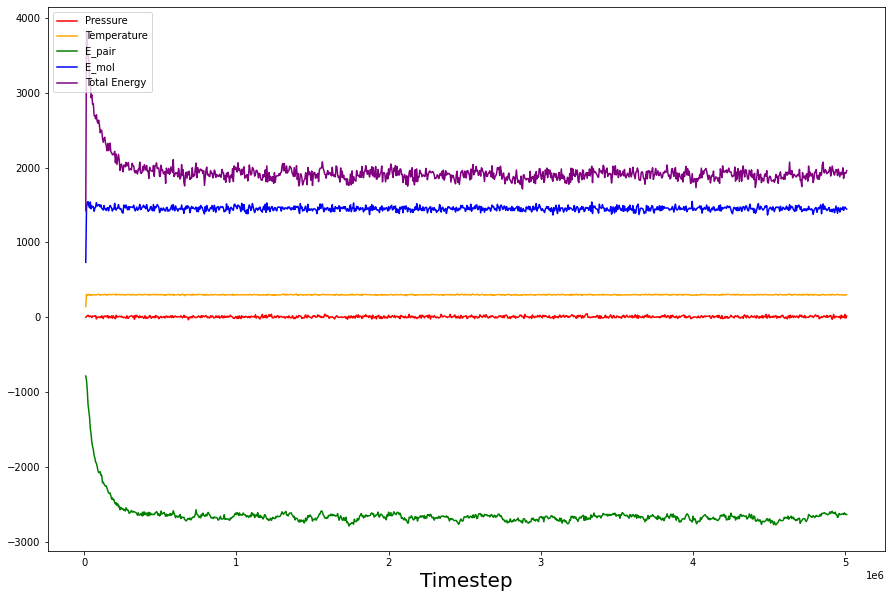

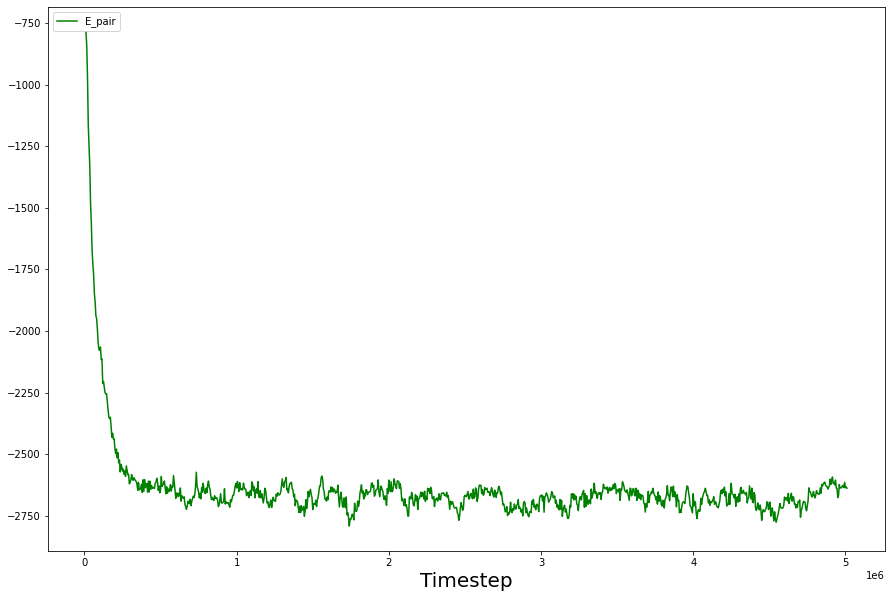

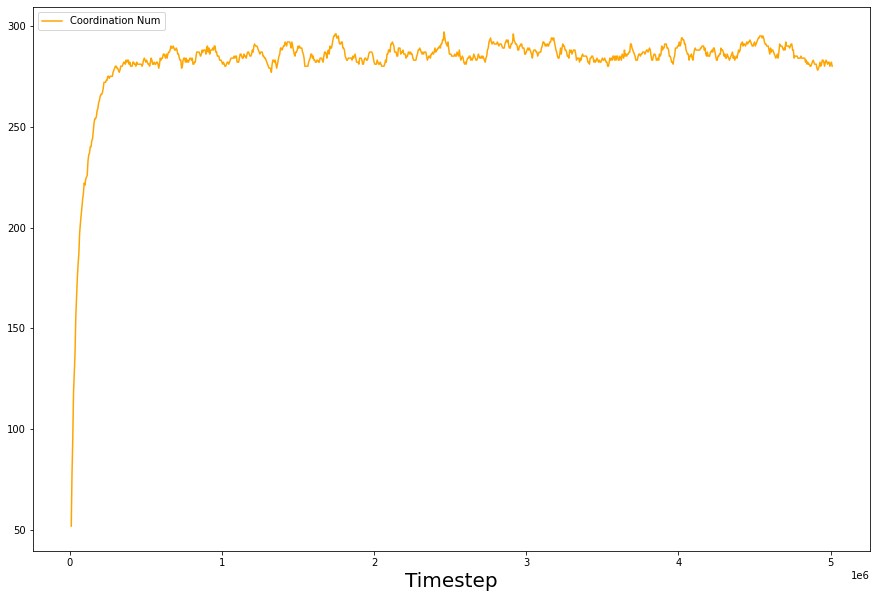

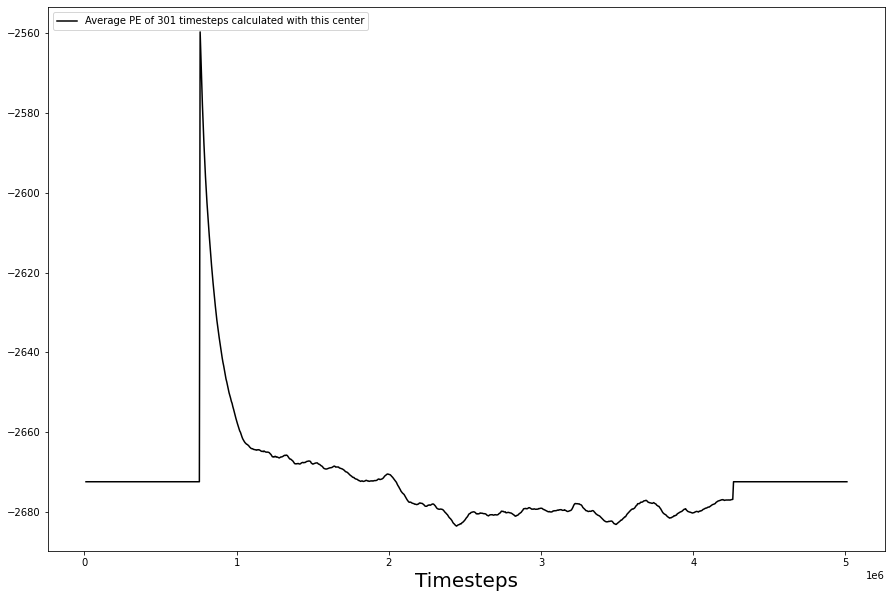

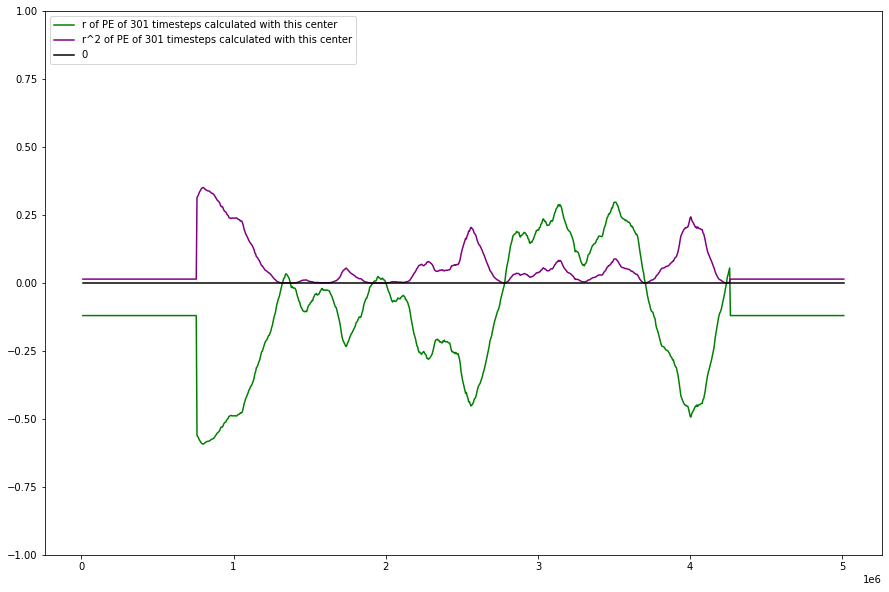

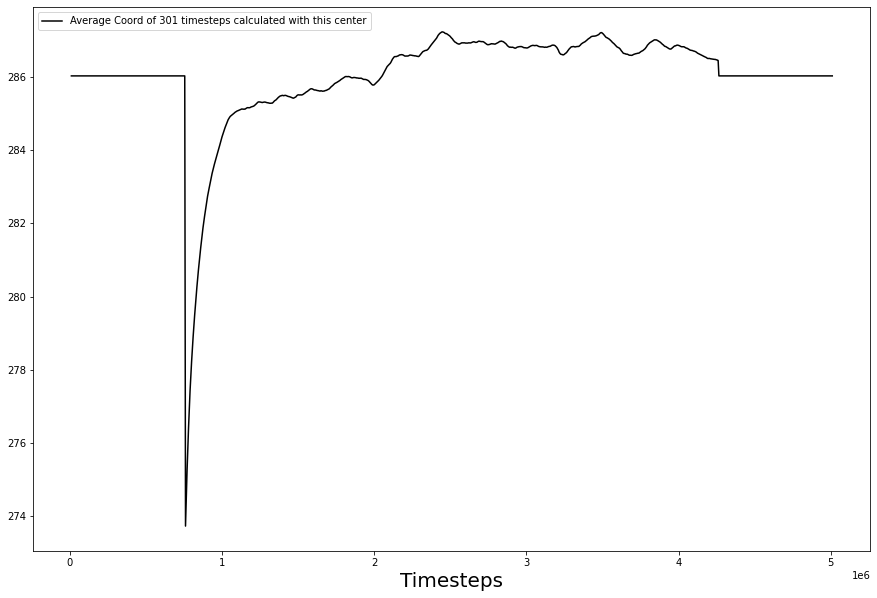

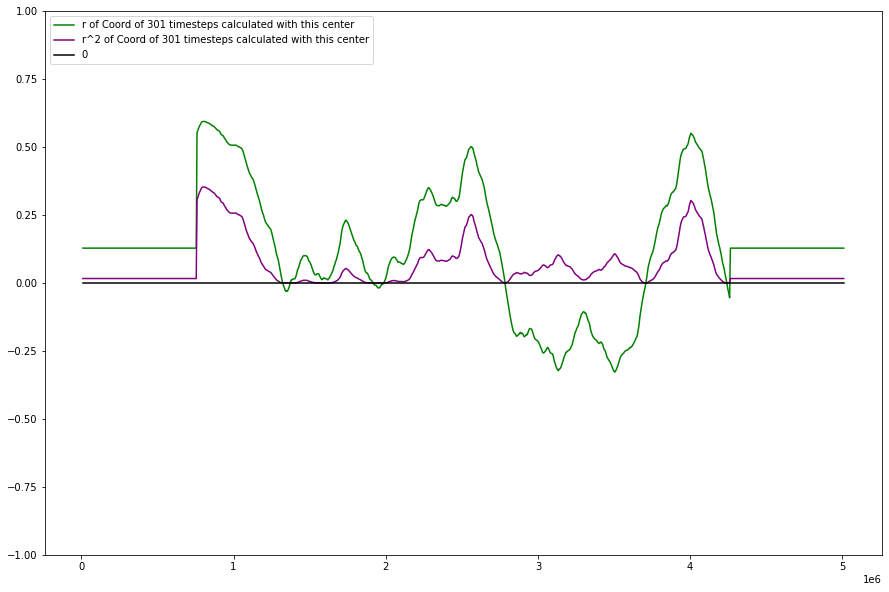

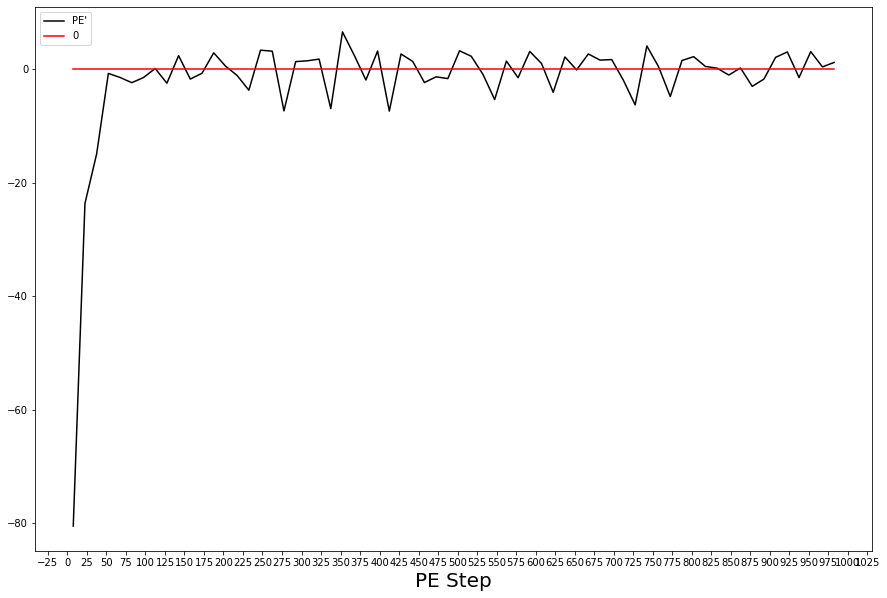

[[111.08703563]
 [113.36652323]
 [135.03333242]
 [151.28028075]
 [175.33524322]
 [207.82513509]
 [240.30120713]
 [267.07155023]
 [290.13676882]
 [325.61653449]
 [345.17241171]
 [376.08016115]
 [387.99452221]
 [402.08469088]
 [423.45670601]
 [448.14067602]
 [492.47215945]
 [528.3526379 ]
 [559.26294507]
 [569.99297558]
 [582.26033933]
 [610.58296543]
 [632.22786118]
 [651.89375847]
 [652.99282871]
 [704.57597414]
 [736.53283487]
 [758.84812627]
 [783.80705396]
 [835.11671716]
 [859.49678227]
 [863.65779599]
 [899.20553989]
 [932.69711736]
 [942.24421685]]


In [19]:
block_width = 301
fatness = 15


'''FIND 2ND EQUILIBRIUM POINT'''


# Make plots
# Basic plots
# Plot thermo data
timesteps = thermo_data["timestep"]
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timesteps, thermo_data["Press"], label="Pressure", color="red", linestyle="solid")
ax.plot(timesteps, thermo_data["Temp"], label="Temperature", color="orange", linestyle="solid")
ax.plot(timesteps, thermo_data["E_pair"], label="E_pair", color="green", linestyle="solid")
ax.plot(timesteps, thermo_data["E_mol"], label="E_mol", color="blue", linestyle="solid")
ax.plot(timesteps, thermo_data["TotEng"], label="Total Energy", color="purple", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/lig%d/thermo.png" % LIG_NUM, bbox_inches="tight")
plt.show()
# Plot e_pair
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timesteps, thermo_data["E_pair"], label="E_pair", color="green", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/lig%d/epair.png" % LIG_NUM, bbox_inches="tight")
plt.show()
# Plot coord number
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(coords_data["timestep"], coords_data["c_coords"], label="Coordination Num", color="orange", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/lig%d/coord.png" % LIG_NUM, bbox_inches="tight")
plt.show()


# Block stats
pe = thermo_data["E_pair"]
pe_steps = [i for i in range(len(pe))]
coord = coords_data["c_coords"]
assert len(pe) == len(coord)
coord_steps = [i for i in range(len(coord))]
pe_avgs, pe_rs, timesteps_raw = util.plot_block_stats("lig", block_width, pe, timesteps, "PE", LIG_NUM)
coord_avgs, coord_rs, _ = util.plot_block_stats("lig", block_width, coord, timesteps, "Coord", LIG_NUM)


# Fat derivatives method
# Initial xlist and ylist: full versions of PE vs. steps
pe = thermo_data["E_pair"]
pe_steps = [i for i in range(len(pe))]

# Reduce both xlist and ylist, i.e. each step is now [fatness] wide instead of one step
fat_pe = []
fat_pe_steps = []
for idx, step in enumerate(pe_steps):
    if idx % fatness == 0:
        fat_pe_steps.append(step)
        fat_pe.append(pe[idx])
x_prime, y_prime = util.num_derivative(fat_pe_steps, fat_pe)

# Plotting
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(x_prime, y_prime, label="PE'", color="black", linestyle="solid")
ax.plot(x_prime, [0]*len(y_prime), label="0", color="red", linestyle="solid")
ax.set_xlabel("PE Step", fontsize=20)
plt.locator_params(axis='x', nbins=50)
plt.legend(loc="upper left")
plt.savefig("figures/lig%d/PE_deriv.png" % LIG_NUM, bbox_inches="tight")
plt.show()

# numerical intersections
x  = x_prime
y1 = y_prime
y2 = np.array([0]*len(y_prime))
xcs, _ = util.find_intercepts(x, y1, y2)

print(xcs)


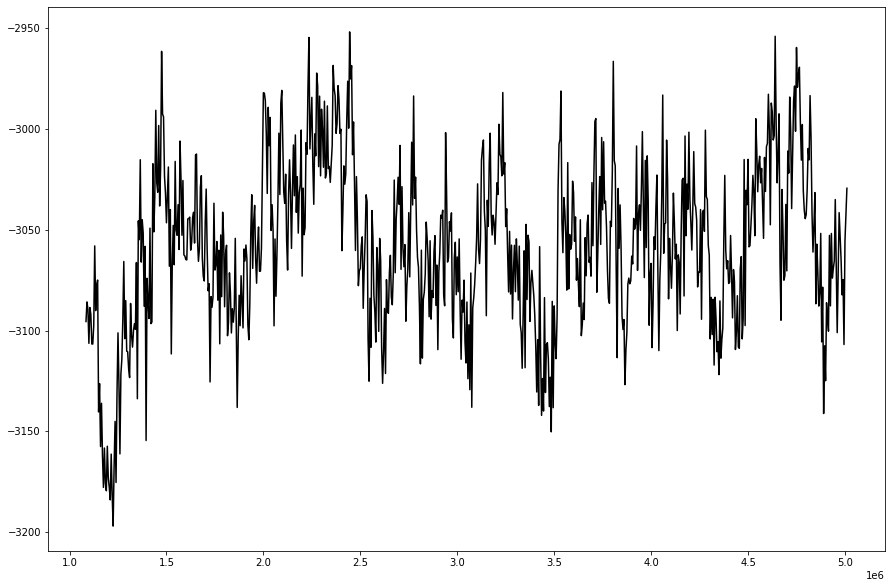

r of whole eq, raw 0.15638954206048106
0.15638954206048106


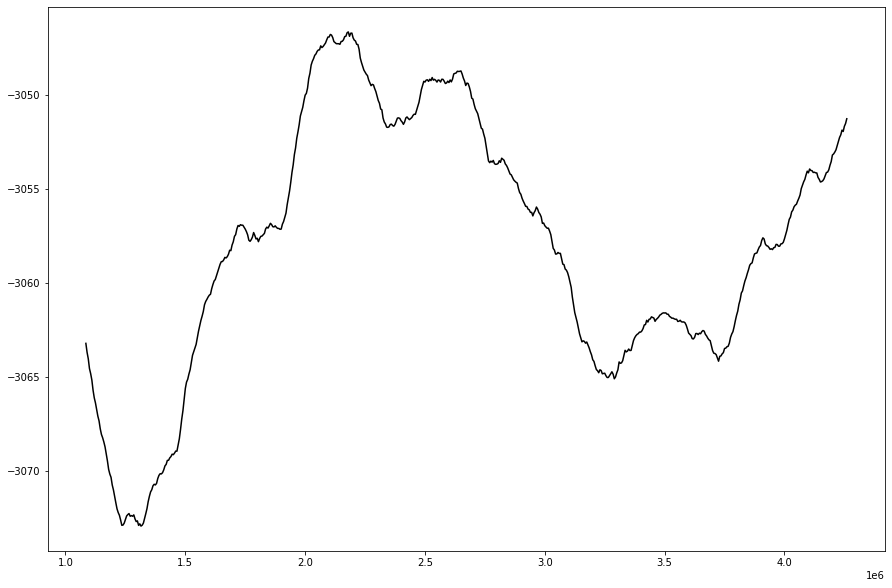

r of whole eq, block 0.1836651681498443
0.1836651681498443


In [17]:
def r_interval(x, y, start, stop):
    if stop is not None:
        cut_y, cut_x = list(y)[start:stop], list(x)[start:stop]
    else:
        cut_y, cut_x = list(y)[start:], list(x)[start:]
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
                cut_x, cut_y)
    
    return r_value




# Correlation tester
eq2_guess = 215
pe_eq_guess = np.delete(pe, pe_steps[:eq2_guess])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
            timesteps[eq2_guess:], pe_eq_guess)
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timesteps[eq2_guess:], pe_eq_guess, color="black", linestyle="solid")
plt.show()

print("r of whole eq, raw", r_value)
print(r_interval(timesteps, pe, 215, None))


eq2_time_guess = timesteps[eq2_guess]
eq2_guess_idx = timesteps_raw.index(eq2_time_guess)
block_steps = [i for i in range(len(timesteps_raw))]
pe_eq_guess_blocks = np.delete(pe_avgs, block_steps[:eq2_guess_idx])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
            timesteps_raw[eq2_guess_idx:], pe_eq_guess_blocks)
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timesteps_raw[eq2_guess_idx:], pe_eq_guess_blocks, color="black", linestyle="solid")
plt.show()

print("r of whole eq, block", r_value)
print(r_interval(timesteps_raw, pe_avgs, eq2_guess_idx, None))

In [ ]:
eq2_point = 23  # an index, the first point counted in the eq interval


'''Calculate using 2nd EQ point'''


# Key outputs
eq2_time = timesteps[eq2_point]
print("approx eq2 point is ", str(eq2_time), " which is at step ", str(eq2_point))

pe_eq = np.delete(pe, pe_steps[:eq2_point])
avg_pe = np.average(pe_eq)
print("Average PE: " + str(avg_pe))

coord_eq = np.delete(coord, pe_steps[:eq2_point])
avg_coord = np.average(coord_eq)
print("Average Coordination Number: " + str(avg_coord))

# Uncertainty
std = np.std(coord_eq, ddof=1)
print("std=" + str(std))

import csv
print("distribution: ", coord_eq)
print("time distribution: ", np.delete(timesteps, pe_steps[:eq2_point]))
with open('out/lig%d/coord_distr.dat' % LIG_NUM, 'w') as f:
    writer = csv.writer(f, delimiter=' ')
    writer.writerows(zip(np.delete(timesteps, pe_steps[:eq2_point]),coord_eq))

    
#Test Normality of the distribution of coordination number after equilibrium
x_range = np.linspace(min(coord_eq), max(coord_eq), num= max(coord_eq) - min(coord_eq) +1)
counts = []
for x in x_range:
    count = 0
    for num in coord_eq:
        if num == x:
            count += 1
    counts.append(count)
fig, ax = plt.subplots(figsize=[15, 10])
ax.scatter(x_range, counts)
plt.show()


with open("out/lig%d/out.txt" % LIG_NUM, "w") as text_file:
    text_file.write("approx eq2 point is " + str(eq2_time) + " which is at step " + str(eq2_point) + "\n")
    text_file.write("Average PE: " + str(avg_pe) + "\n")
    text_file.write("Average Coordination Number: " + str(avg_coord) + "\n")
    text_file.write("\n" + "std=" + str(std) + "\n")
    text_file.write("distribution: ")
    text_file.write(str(coord_eq))
    text_file.write(str(np.delete(timesteps, pe_steps[:eq2_point])))


OLD CODE


Block average, centered around step
PE
half_block = int(0.5*(block_width-1))
avg_pes = []
sigma_pes = []
r_pes = []
step_range = range(len(pe))[half_block:-half_block]
for step in step_range:
    pe_block = pe[step-half_block:step+half_block+1]
    avg_pe = np.average(pe_block)
    avg_pes.append(avg_pe)
    sigma_pes.append(np.std(pe_block, ddof=1))
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
        timesteps[step-half_block:step+half_block+1], pe_block)
    r_pes.append(r_value)
timestep_range = [timesteps[i] for i in step_range]
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timestep_range, avg_pes, label="Average PE of %d timesteps calculated with this center" % block_width, 
        color="black", linestyle="solid")
ax.set_xlabel("Timesteps", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/lig%d/PE_avg_block.png" % LIG_NUM, bbox_inches="tight")
plt.show()
Coord
avg_coords = []
sigma_coords = []
for step in step_range:
    coord_block = coord[step-half_block:step+half_block+1]
    avg_coord = np.average(coord_block)
    avg_coords.append(avg_coord)
    sigma_coords.append(np.std(coord_block, ddof=1))
timestep_range = [timesteps[i] for i in step_range]
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timestep_range, avg_coords, label="Average Coord # of %d timesteps calculated with this center" % 
        block_width, 
        color="black", linestyle="solid")
ax.set_xlabel("Timesteps", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/lig%d/Coord_avg_block.png" % LIG_NUM, bbox_inches="tight")
plt.show()
Sigmas
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timestep_range, sigma_pes, label="Sigma of PE of %d timesteps calculated with this center" % block_width, 
        color="blue", linestyle="solid")
plt.legend(loc="upper left")
plt.savefig("figures/lig%d/sigmas_coord_pe_block.png" % LIG_NUM, bbox_inches="tight")
plt.show()
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timestep_range, sigma_coords, label="Sigma of Coords of %d timesteps calculated with this center" % 
        block_width, color="red", linestyle="solid")
plt.legend(loc="upper left")
plt.savefig("figures/lig%d/sigmas_coord_pe_block.png" % LIG_NUM, bbox_inches="tight")
plt.show()

# More old code




block_width = 301
fatness = 15


'''FIND 2ND EQUILIBRIUM POINT'''


# Make plots
# Basic plots
# Plot thermo data
timesteps = thermo_data["timestep"]
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timesteps, thermo_data["Press"], label="Pressure", color="red", linestyle="solid")
ax.plot(timesteps, thermo_data["Temp"], label="Temperature", color="orange", linestyle="solid")
ax.plot(timesteps, thermo_data["E_pair"], label="E_pair", color="green", linestyle="solid")
ax.plot(timesteps, thermo_data["E_mol"], label="E_mol", color="blue", linestyle="solid")
ax.plot(timesteps, thermo_data["TotEng"], label="Total Energy", color="purple", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/lig%d/thermo.png" % LIG_NUM, bbox_inches="tight")
plt.show()
# Plot e_pair
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timesteps, thermo_data["E_pair"], label="E_pair", color="green", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/lig%d/epair.png" % LIG_NUM, bbox_inches="tight")
plt.show()
# Plot coord number
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(coords_data["timestep"], coords_data["c_coords"], label="Coordination Num", color="orange", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/lig%d/coord.png" % LIG_NUM, bbox_inches="tight")
plt.show()

# Average to the end
# PE
pe = thermo_data["E_pair"]
pe_steps = [i for i in range(len(pe))]
avg_pes = []
for step in pe_steps:
    #print(pe_steps[:step])
    pe_eq = np.delete(pe, pe_steps[:step])
    avg_pe = np.average(pe_eq)
    avg_pes.append(avg_pe)
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timesteps, avg_pes, label="avg_pes", color="black", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/lig%d/PE_avg_end.png" % LIG_NUM, bbox_inches="tight")
plt.show()
# Coord
coord = coords_data["c_coords"]
assert len(pe) == len(coord)
coord_steps = [i for i in range(len(coord))]
avg_coords = []
for step in coord_steps:
    #print(pe_steps[:step])
    coord_eq = np.delete(coord, coord_steps[:step])
    avg_coord = np.average(coord_eq)
    avg_coords.append(avg_coord)
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(coord_steps, avg_coords, label="avg_coords", color="black", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/lig%d/coord_avg_end.png" % LIG_NUM, bbox_inches="tight")
plt.show()

# Block stats
util.plot_block_stats("lig", block_width, pe, timesteps, "PE", LIG_NUM)
util.plot_block_stats("lig", block_width, coord, timesteps, "Coord", LIG_NUM)


# Fat derivatives method
# Initial xlist and ylist: full versions of PE vs. steps
pe = thermo_data["E_pair"]
pe_steps = [i for i in range(len(pe))]

# Reduce both xlist and ylist, i.e. each step is now [fatness] wide instead of one step
fat_pe = []
fat_pe_steps = []
for idx, step in enumerate(pe_steps):
    if idx % fatness == 0:
        fat_pe_steps.append(step)
        fat_pe.append(pe[idx])
x_prime, y_prime = util.num_derivative(fat_pe_steps, fat_pe)

# Plotting
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(x_prime, y_prime, label="PE'", color="black", linestyle="solid")
ax.plot(x_prime, [0]*len(y_prime), label="0", color="red", linestyle="solid")
ax.set_xlabel("PE Step", fontsize=20)
plt.locator_params(axis='x', nbins=50)
plt.legend(loc="upper left")
plt.savefig("figures/lig%d/PE_deriv.png" % LIG_NUM, bbox_inches="tight")
plt.show()

# numerical intersections
x  = x_prime
y1 = y_prime
y2 = np.array([0]*len(y_prime))
xcs, _ = util.find_intercepts(x, y1, y2)

print(xcs)
